In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/X_test.csv')

print(f"Train data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Train data: (8000, 10)
Test data: (2000, 10)


In [4]:
models = {
    'Logistic Regresion' : LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
trained_models = {}


TRAINING BASELINE MODELS

Training: Logistic Regresion
========== DEBUGGING LABELS ==========
y_test shape: (2000,) dtype: int64 unique: [-3 -2 -1  0  1  2]
y_pred shape: (2000,) dtype: int64 unique: [0 1]
y_pred_prob shape: (2000,) dtype: float64
Remapping multiclass labels to binary...
FINAL LABELS: [0 1]
FINAL PREDICTIONS: [0]
Results: 
Accuracy:  0.9710
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC-AUC:   0.4060
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       0.00      0.00      0.00        58

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.94      0.97      0.96      2000



/home/baggybro/skills/machine/churn-platform/venv/lib64/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/baggybro/skills/machine/churn-platform/venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/baggybro/skills/machine/churn-platform/venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

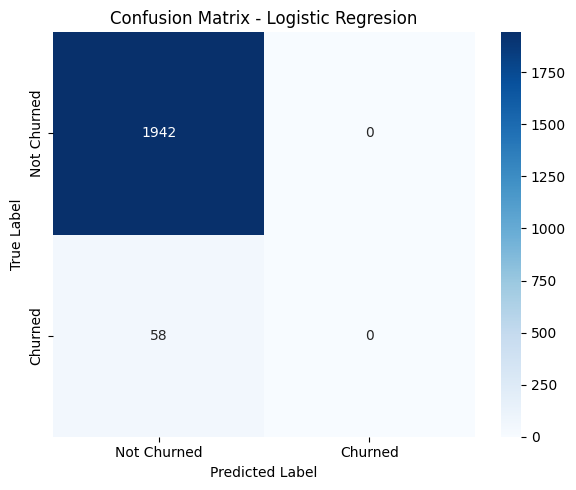


Training: Random Forest


/home/baggybro/skills/machine/churn-platform/venv/lib64/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


========== DEBUGGING LABELS ==========
y_test shape: (2000,) dtype: int64 unique: [0 1]
y_pred shape: (2000,) dtype: int64 unique: [0 1]
y_pred_prob shape: (2000,) dtype: float64
FINAL LABELS: [0 1]
FINAL PREDICTIONS: [0 1]
Results: 
Accuracy:  0.8565
Precision: 0.0169
Recall:    0.0690
F1 Score:  0.0271
ROC-AUC:   0.4832
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1942
           1       0.02      0.07      0.03        58

    accuracy                           0.86      2000
   macro avg       0.49      0.47      0.47      2000
weighted avg       0.94      0.86      0.90      2000



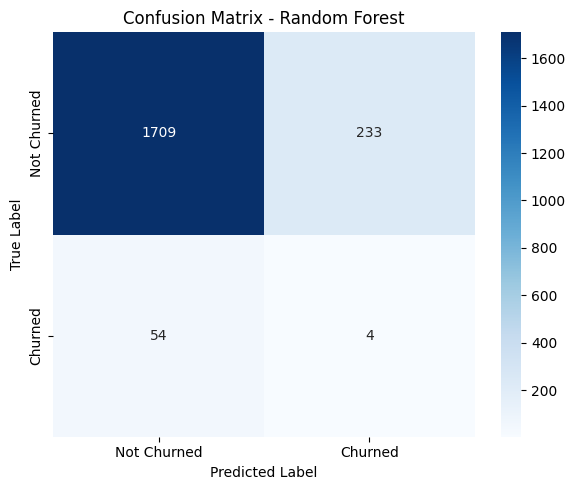


Training: Gradient Boosting


/home/baggybro/skills/machine/churn-platform/venv/lib64/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========== DEBUGGING LABELS ==========
y_test shape: (2000,) dtype: int64 unique: [0 1]
y_pred shape: (2000,) dtype: int64 unique: [0 1]
y_pred_prob shape: (2000,) dtype: float64
FINAL LABELS: [0 1]
FINAL PREDICTIONS: [0 1]
Results: 
Accuracy:  0.8540
Precision: 0.0244
Recall:    0.1034
F1 Score:  0.0395
ROC-AUC:   0.4078
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1942
           1       0.02      0.10      0.04        58

    accuracy                           0.85      2000
   macro avg       0.50      0.49      0.48      2000
weighted avg       0.94      0.85      0.90      2000



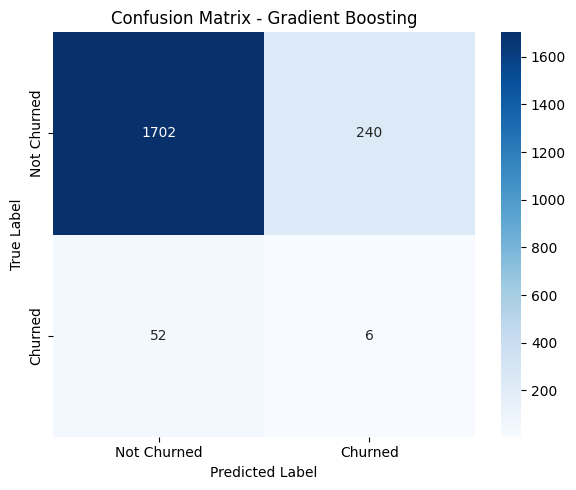

In [ ]:
print("\n" + "="*70)
print("TRAINING BASELINE MODELS")
print("="*70)

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training: {name}")
    print('='*70)

    model.fit(X_train, y_train)
    trained_models[name] = model

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.iloc[:, 0]

    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)

    print("="*10 + " DEBUGGING LABELS " + "="*10)
    print("y_test shape:", y_test.shape, "dtype:", y_test.dtype, "unique:", np.unique(y_test))
    print("y_pred shape:", y_pred.shape, "dtype:", y_pred.dtype, "unique:", np.unique(y_pred))
    print("y_pred_prob shape:", y_pred_prob.shape, "dtype:", y_pred_prob.dtype)

    if len(np.unique(y_test)) > 2:
        print("Remapping multiclass labels to binary...")
        major_val = np.min(np.unique(y_test))
        minor_val = np.max(np.unique(y_test))
        y_test = (y_test == minor_val).astype(int)
        y_pred = (y_pred == minor_val).astype(int)

    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)

    print("FINAL LABELS:", np.unique(y_test))
    print("FINAL PREDICTIONS:", np.unique(y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    print("Results: ")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
